In [1]:
#Import all Libraries
import numpy as np
from random import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Defining the Gibbs Sampler Function
def gib(N,n,a,b,cc,d,xbar,ssquared):
    mat=[]
    mu=cc
    tau=a/b
    mat.append([mu,tau])
    for i in range(N):
        muprec=(n*tau) + d
        mumean=(d*cc + n*tau*xbar)/muprec
        mu=np.random.normal(mumean,np.sqrt(1/muprec))
        taub=b+ 0.5 *((n-1)*ssquared + n *np.power(xbar - mu,2))
        tau=np.random.gamma(a+n/2,1/taub)
        mat.append([mu,tau])
    return mat

    

In [21]:
#Let's do a Trial with N=10,000 and considering d=0.01
Trial1=gib(10000,20,1,1,3,0.01,30,20)
Trial1=np.array(Trial1)

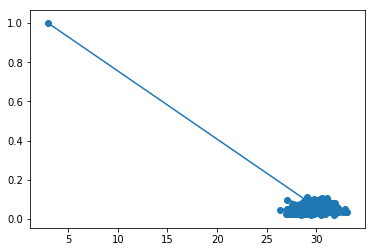

In [22]:
#Burn-in Period of 1000
burn_in=np.array(Trial1[:1000])
Samples=np.array(Trial1[1000:])
plt.plot(burn_in[:,0],burn_in[:,1])
plt.scatter(burn_in[:,0],burn_in[:,1])

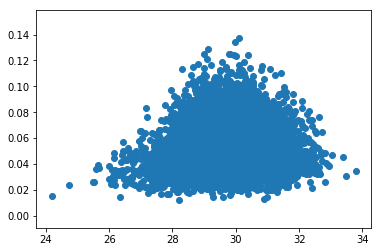

In [23]:
#Scatter plot of the Samples-after the burn-in Period
#plt.plot(Samples[:,0],Samples[:,1])
plt.scatter(Samples[:,0],Samples[:,1])
#Conclusion:
#Intuitely Seems Correct as it is centered around 30 with Tau around 0.05

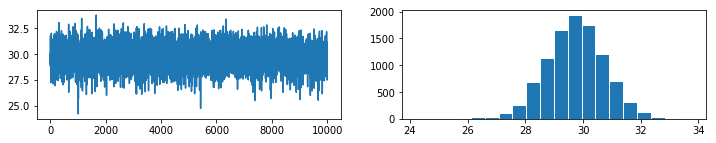

In [26]:
#Marginal distribution of Mu
fig,ax=plt.subplots(1,2,figsize=(12,2))
ax[0].plot(range(10000),Trial1[1:,0])
ax[1].hist(Trial1[1:,0],bins=20,ec='white')
plt.show()

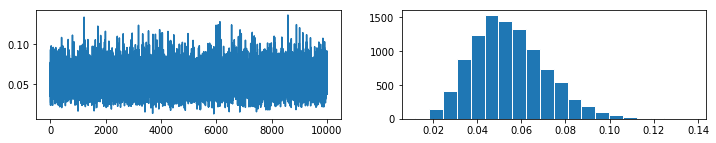

In [33]:
#Marginal distribution of Tau
fig,ax=plt.subplots(1,2,figsize=(12,2))
ax[0].plot(range(10000),Trial1[1:,1])
ax[1].hist(Trial1[1:,1],bins=20,ec='white')
plt.show()

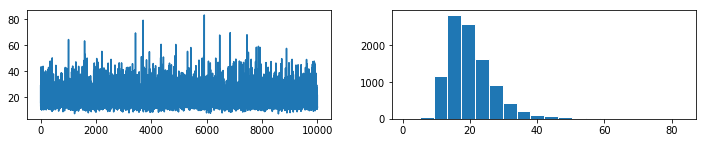

In [34]:
#Marginal distribution of Sigma-sqaured
fig,ax=plt.subplots(1,2,figsize=(12,2))
ax[0].plot(range(10000),1/Trial1[1:,1])
ax[1].hist(1/Trial1[:,1],bins=20,ec='white')
plt.show()